# Import Data  
This coding practice was designed for 3 hour completion in class.  Learners will fill the incomplete codes (None) to make them complete.  Given a project structure as follows  
- Project  
  - src  
  - data  
  - plot  

Your `.ipynb` file was saved in the `src` folder and your data was saved in the `data` folder.  
**Activity 1**: Read data in an `xlsx` file to a pandas dataframe.

In [ ]:
import pandas as pd

# --- To be completed by students ---
df = pd.read_excel("./data/ENB2012_data.xlsx", sheet_name="data")
# -----------------------------------

Explore the first 10 rows in the dataframe.

In [ ]:
# --- To be completed by students ---
df.head(10)
# -----------------------------------

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


Check for data type of each columns

In [ ]:
df.dtypes

X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6      int64
X7    float64
X8      int64
Y1    float64
Y2    float64
dtype: object

**Activity 2**: Label preparation.  Our label indicates whether a sample is an energy saving or not.  The energy saving refers to the difference between heating load (hl) and the cooling load (cl) that is greater than a threshold (alpha).  In this tutorials, we set alpha equal to 1.  Complete the following utility function `getlabel`.

In [ ]:
import numpy as np

def getlabel(hl, cl, alpha=1):
    # --- To be completed by students ---
    if np.abs(hl - cl) - alpha >= 0:
    # -----------------------------------
        return 1
    else:
        return 0

Apply the `getlabel` to create the new column in dataframe `df` using the annonymous function `lambda`.

In [ ]:
df["is_energy_saving"] = df.apply(lambda x: getlabel(x["Y1"], x["Y2"]), axis=1)

Explore the dataframe `df` again.

In [ ]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,is_energy_saving
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,1
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,1
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,1
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,1
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,1


# Exploratory Data Analysis  

For classification task, it is important to understand the class distribution.  
Use `groupby` to explore the class distribution over `is_energy_saving`.

In [ ]:
df.groupby("is_energy_saving").size().reset_index(name="#")

,is_energy_saving,#
0,0,148
1,1,620


Make sure that all variables are usable and clearly defined.  

In [ ]:
df.groupby("X8").size().reset_index(name="#")

,X8,#
0,0,48
1,1,144
2,2,144
3,3,144
4,4,144
5,5,144


By cross checking with the dataset documents, we found that the variable `X8` was inconsistent.  The document defined its possible values as 1, 2, 3, 4, and 5 but the actual data has undefined value as zero.  Therefore, the `X8` will be excluded from our analysis.

# Create dummy variables  

Logistic regerssion requires dummy variables to handle a categorical variable.  
**Activity 3**: Map the following values in `X6` then create dummy variables.  
- 2: north  
- 3: east  
- 4: south  
- 5: west  

Then concatenate the dummy variables to the original dataframe.

In [ ]:
# --- To be completed by students ---
df["orientation"] = df["X6"].map({2: "north", 3: "east", 4: "south", 5: "west"})
orientation = pd.get_dummies(df["orientation"])
# -----------------------------------

In [ ]:
orientation.head()

,east,north,south,west
0,0,1,0,0
1,1,0,0,0
2,0,0,1,0
3,0,0,0,1
4,0,1,0,0


In [ ]:
# --- To be completed by students ---
df = pd.concat([df, orientation], axis=1)
# -----------------------------------

In [ ]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,is_energy_saving,orientation,east,north,south,west
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,1,north,0,1,0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,1,east,1,0,0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,1,south,0,0,1,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,1,west,0,0,0,1
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,1,north,0,1,0,0


# Data Splitting  

Data splitting relies on randomization processes.  To make a reproducable experiment, we will set a random seed first.  
**Activity 4**: Split the original data into 3 dataframes: `train` (70%), `test` (15%), `val` (15%).  For the consistent splitting, we will split the original data to remain:test at 85:15 then split the remain data to train:val at 70:15 with respect to the size of original data.  The prepare `X` and `y` from the original dataframe `df`.

In [ ]:
from sklearn.model_selection import train_test_split

seed = 433 # Set random seed

# ----------------- To be completed by students -----------------
remain, test = train_test_split(df, test_size=int(np.floor(0.15 * len(df.index))),
                                stratify=df["is_energy_saving"], random_state=seed)

train, val = train_test_split(remain, test_size=int(np.floor(0.15 * len(df.index))),
                              stratify=remain["is_energy_saving"], random_state=seed)
# ---------------------------------------------------------------

Defiine your full dataset `X` and `y` from the dataframe `df`.  The `X` takes `X1`, `X2`, `X3`, `X4`, `X5`, `east`, `south`, `west`, and `X7` as features.  The target `y` is `is_energy_saving`.

In [ ]:
# --- To be completed by students ---
X = df.loc[:, ["X1", "X2", "X3", "X4", "X5", "east", "south", "west", "X7"]].values
y = df["is_energy_saving"].values.ravel()
# -----------------------------------

Make sure that the class distribution in `train`, `val`, and `test` are almost the same by using visualization.

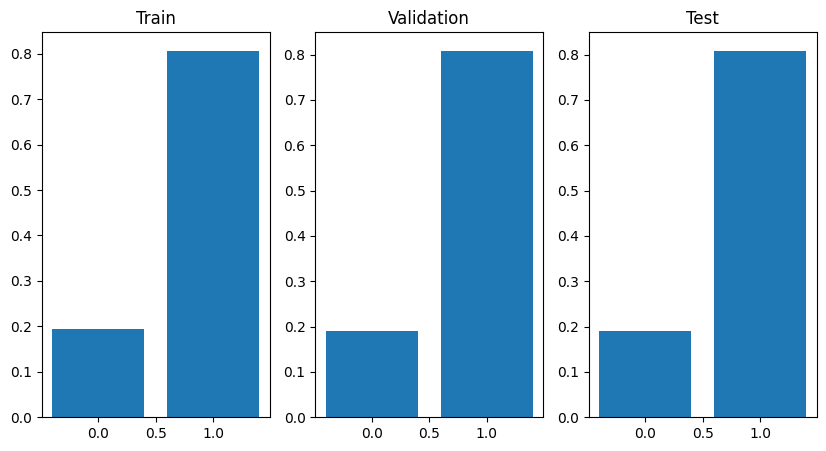

In [ ]:
import matplotlib.pyplot as plt

train_dist = train.groupby("is_energy_saving").size().reset_index(name="#")
train_dist["%"] = train_dist["#"] / train_dist["#"].sum()

val_dist = val.groupby("is_energy_saving").size().reset_index(name="#")
val_dist["%"] = val_dist["#"] / val_dist["#"].sum()

test_dist = test.groupby("is_energy_saving").size().reset_index(name="#")
test_dist["%"] = test_dist["#"] / test_dist["#"].sum()

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
ax[0].bar(train_dist["is_energy_saving"], train_dist["%"])
ax[0].set_title("Train")
ax[1].bar(val_dist["is_energy_saving"], val_dist["%"])
ax[1].set_title("Validation")
ax[2].bar(test_dist["is_energy_saving"], test_dist["%"])
ax[2].set_title("Test")
plt.show()

# Modeling  
`RandomSearchCV` and `GridSearchCV` were applied as our model tuning strategies.  The `RandomSearchCV` was applied first to determine roughly optimal set of hyperparameters on the hyperplane.  There are several hyperparameters can be tuned.  For understanding purpose, our tutorials will tune only 2 hyperparameters: `C` and `penalty`.  

Create a random hyperplane of `C` and `penalty`

In [ ]:
from scipy.stats import uniform

np.random.seed(seed)
rd_hparams = dict(C=uniform(loc=0, scale=5), penalty=["l2", "l1"])

**Activity 5**: Initialize a `Logistic Regression` to learn from balanced class distribution.  Use our predefined random seed and fit the model with `saga` optimizer.  Set the maximum learning iteration at 500.  Then apply the `RandomSearchCV` to our `Logistic Regression` using train, test, validate approach.  Use `accuracy` as the metrics for model convergence monitoring.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# ----------------- To be completed by students -----------------
logreg = LogisticRegression(class_weight="balanced",
                            random_state=seed,
                            verbose=1,
                            solver="saga",
                            max_iter=5000)

rand_tune = RandomizedSearchCV(logreg,
                               rd_hparams,
                               random_state=seed,
                               cv=[(train.index, val.index)],
                               scoring="accuracy")

rand_search = rand_tune.fit(X, y)
# ---------------------------------------------------------------

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3579 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3579 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3582 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3579 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3578 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3563 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3579 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3589 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3561 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3579 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 2937 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished


The best estimator from `RandomSearchCV` can be accessed via the attribute `best_estimator_`

In [ ]:
rand_search.best_estimator_

LogisticRegression(C=2.3907937312322107, class_weight='balanced', max_iter=5000,
                   penalty='l1', random_state=433, solver='saga', verbose=1)

The best estimator located approximately optimum set of hyperparameters.  Let's define the precise grid of hyperparameters for fine tuning.  Since the `penalty` is a categorical variable, we will use as is without fine tuning.  

**Activity 6**: Create a 1D grid where each tick moves around 0.05 for 5 ticks before and after the best `C` obtained from `RandomSearchCV`.

In [ ]:
# ------ To be completed by students ------
C = [rand_search.best_estimator_.C + 0.05*i for i in range(-5, 6)]
# -----------------------------------------

Define the grid for `GridSearchCV` to precisely determine the set of optimum hyperparameters.

In [ ]:
gd_hparams = {"C": [i if i > 0 else 0.01 for i in C], "penalty": [rand_search.best_estimator_.penalty]}

**Activity 7**: Initialize the `Logistic Regression` with the same hyperparameters as the `RandSearchCV` but apply it on the `GridSearchCV`.

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression(class_weight="balanced",
                         random_state=seed,
                         verbose=1,
                         solver="saga",
                         max_iter=5000)

# ----------------- To be completed by students -----------------
grid_tune = GridSearchCV(clf, gd_hparams, cv=[(train.index, val.index)], scoring="accuracy")
grid_search = grid_tune.fit(X, y)
# ---------------------------------------------------------------

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3579 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3579 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3579 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3579 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3579 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3579 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3579 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3579 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3579 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3579 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3579 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 2937 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished


Let see our best estimator from `GridSearchCV`.

In [ ]:
grid_search.best_estimator_

LogisticRegression(C=2.1407937312322107, class_weight='balanced', max_iter=5000,
                   penalty='l1', random_state=433, solver='saga', verbose=1)

Model parameters of `Logistic Regression` can be accessed via `coef_` and `intercept_`.

In [ ]:
grid_search.best_estimator_.coef_

array([[ 0.030608  ,  0.00565143, -0.02404448,  0.01484784,  0.28914104,
        -0.03731397, -0.00266015,  0.04652178, -0.06457296]])

In [ ]:
grid_search.best_estimator_.intercept_

array([0.02590085])

# Prediction  

The trained model is ready for prediction.  Use `predict_proba` to estimate prediction probability.

In [ ]:
probs = grid_search.best_estimator_.predict_proba(X[test.index])

The first column of `probs` refers to $P(y=0|X)$.  The second column of `probs` refers to $P(y=1|X)$.  

In [ ]:
probs

array([[0.13585799, 0.86414201],
       [0.59797887, 0.40202113],
       [0.37895052, 0.62104948],
       [0.38434943, 0.61565057],
       [0.28447538, 0.71552462],
       [0.48879907, 0.51120093],
       [0.61318029, 0.38681971],
       [0.13881597, 0.86118403],
       [0.37618302, 0.62381698],
       [0.38060542, 0.61939458],
       [0.4771826 , 0.5228174 ],
       [0.0917886 , 0.9082114 ],
       [0.49745012, 0.50254988],
       [0.61610454, 0.38389546],
       [0.48704364, 0.51295636],
       [0.91245842, 0.08754158],
       [0.60262691, 0.39737309],
       [0.62199256, 0.37800744],
       [0.60208938, 0.39791062],
       [0.08572396, 0.91427604],
       [0.37604928, 0.62395072],
       [0.36519811, 0.63480189],
       [0.61151252, 0.38848748],
       [0.64415232, 0.35584768],
       [0.19911109, 0.80088891],
       [0.13128746, 0.86871254],
       [0.19603993, 0.80396007],
       [0.38894345, 0.61105655],
       [0.27888536, 0.72111464],
       [0.37832466, 0.62167534],
       [0.

# Prediction and Inference

Model calibration helps to get better inference the predicted labels by determining the cutoff probability from the `training data`.  Without calibration, the default cutoff in `scikit-learn` is set at 0.5 and can be directly inference via `predict`. Basic idea to derive the optimum cutoff is the `ROC curve` where the optimum cutoff makes the curve approch to the top left corner.  Therefore, the optimum cutoff yields the maximum difference between `TPR` (True-Positive Rate) and `FPR` (False-Positive Rate).  

**Activity 8**: Use `roc_curve` to determine the optimum cutoff.

In [ ]:
from sklearn.metrics import roc_curve

# --------------------- To be completed by students ---------------------
p = grid_search.best_estimator_.predict_proba(X[train.index])
fpr, tpr, thresholds = roc_curve(y_true=y[train.index], y_score=p[:, 1], pos_label=1)
idx = np.argmax(tpr - fpr)
cutoff = thresholds[idx]

print("The optimum cutoff is {}".format(round(cutoff, 3)))
# -----------------------------------------------------------------------

The optimum cutoff is 0.525


Use the `cutoff` to derive predicted labels.

In [ ]:
yhat = (probs[:, 1] >= cutoff).astype(int)

In [ ]:
yhat

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0])

# Evaluation  

Model performance evaluation starts from deriving a confusion matrix.  Performance metrics such as `precision`, `recall`, `F1`, and `accuracy` can be obtained from the confusion matrix.

**Activity 9**: Get the confusion matrix.

In [ ]:
from sklearn.metrics import confusion_matrix

# ------ To be completed by students ------
cmat = confusion_matrix(y[test.index], yhat)
# -----------------------------------------

print(cmat)

[[19  3]
 [34 59]]


For binary classification, each count is located as follows.  
- `TP`: cmat[1, 1]  
- `TN`: cmat[0, 0]  
- `FP`: cmat[0, 1]  
- `FN`: cmat[1, 0]

**Activity 10**: Measure `precision`, `recall`, `F1`, and `accuracy`.

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# ------ To be completed by students ------
precision = precision_score(y[test.index], yhat)
recall = recall_score(y[test.index], yhat)
accuracy = accuracy_score(y[test.index], yhat)
f1 = f1_score(y[test.index], yhat)
# -----------------------------------------

print("Precision is {}".format(round(precision, 3)))
print("Recall is {}".format(round(recall, 3)))
print("Accuracy is {}".format(round(accuracy, 3)))
print("F1 is {}".format(round(f1, 3)))

Precision is 0.952
Recall is 0.634
Accuracy is 0.678
F1 is 0.761


Explore the model behaviors in `ROC Curve`.

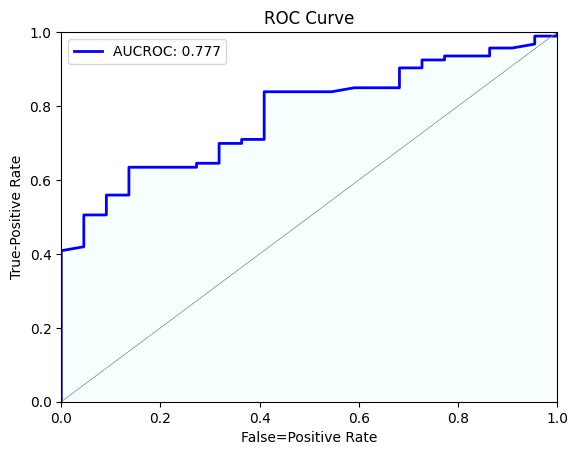

In [ ]:
from sklearn.metrics import roc_auc_score

aucroc = roc_auc_score(y_true=y[test.index], y_score=probs[:, 1])
fpr, tpr, thresholds = roc_curve(y_true=y[test.index], y_score=probs[:, 1], pos_label=1)

plt.style.use("default")
plt.plot(fpr, tpr, color="blue", linewidth=2, label="AUCROC: {}".format(round(aucroc, 3)))
plt.plot([0, 1], [0, 1], color="gray", linewidth=0.5)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("False=Positive Rate")
plt.ylabel("True-Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.fill_between(fpr, tpr, color="azure", alpha=0.5)
plt.savefig("../plot/roc_logreg.svg", format="svg")

# Analysis of Error  

Constructing a building takes long time and consumes high costs.  Therefore, `precision` is more important than `recall` because `FP` (identify non-energy saving as energy-saving) could lead to the wrong investment.  Our analysis of error will focus on `FP` samples.  

Let's add 2 columns ($P(y=1|X)$ and `yhat`) to the test dataframe

In [ ]:
samples = test.copy()
samples["P(y|X)"] = probs[:, 1]
samples["yhat"] = yhat

samples.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,is_energy_saving,orientation,east,north,south,west,P(y|X),yhat
510,0.71,710.5,269.5,220.5,3.5,4,0.25,5,12.25,15.23,1,south,0,0,1,0,0.864142,1
112,0.79,637.0,343.0,147.0,7.0,2,0.10,2,35.65,41.07,1,north,0,1,0,0,0.402021,0
346,0.86,588.0,294.0,147.0,7.0,4,0.25,2,29.27,29.90,0,south,0,0,1,0,0.621049,1
89,0.64,784.0,343.0,220.5,3.5,3,0.10,1,15.20,19.43,1,east,1,0,0,0,0.615651,1
229,0.66,759.5,318.5,220.5,3.5,3,0.10,4,11.42,14.67,1,east,1,0,0,0,0.715525,1


Perform dataframe slicing to get only `FP` samples.

In [ ]:
fp = samples[(samples["is_energy_saving"] == 0) & (samples["yhat"] == 1)]

fp.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,is_energy_saving,orientation,east,north,south,west,P(y|X),yhat
346,0.86,588.0,294.0,147.0,7.0,4,0.25,2,29.27,29.90,0,south,0,0,1,0,0.621049,1
155,0.86,588.0,294.0,147.0,7.0,5,0.10,3,26.46,27.40,0,west,0,0,0,1,0.634802,1
249,0.86,588.0,294.0,147.0,7.0,3,0.10,5,26.45,27.33,0,east,1,0,0,0,0.615156,1


Explaining wrong prediction over these samples requires domain knowledge and probably statistics.

In [ ]:
volume_to_surface_ratio = fp["X1"].describe()
volume_to_surface_ratio

count    3.00
mean     0.86
std      0.00
min      0.86
25%      0.86
50%      0.86
75%      0.86
max      0.86
Name: X1, dtype: float64

In [ ]:
surface_area = fp["X2"].describe()
surface_area

count      3.0
mean     588.0
std        0.0
min      588.0
25%      588.0
50%      588.0
75%      588.0
max      588.0
Name: X2, dtype: float64

In [ ]:
wall_area = fp["X3"].describe()
wall_area

count      3.0
mean     294.0
std        0.0
min      294.0
25%      294.0
50%      294.0
75%      294.0
max      294.0
Name: X3, dtype: float64

In [ ]:
roof_area = fp["X4"].describe()
roof_area

count      3.0
mean     147.0
std        0.0
min      147.0
25%      147.0
50%      147.0
75%      147.0
max      147.0
Name: X4, dtype: float64

In [ ]:
overall_height = fp["X5"].describe()
overall_height

count    3.0
mean     7.0
std      0.0
min      7.0
25%      7.0
50%      7.0
75%      7.0
max      7.0
Name: X5, dtype: float64

In [ ]:
orientation = fp["orientation"].describe()
orientation

count         3
unique        3
top       south
freq          1
Name: orientation, dtype: object

In [ ]:
glazing_area = fp["X7"].describe()
glazing_area

count    3.000000
mean     0.150000
std      0.086603
min      0.100000
25%      0.100000
50%      0.100000
75%      0.175000
max      0.250000
Name: X7, dtype: float64

The overall building characteristics seems to be hard for heat transferred.  The harder heat transferred the less energy consumption to maintain temperature inside the building.  However, such buildings seems to be very large indicated to volume and overall height.  These characteristics could confuse our model to make non-energy saving building as an energy saving building.

# Congratulation  

Weldone.  You have completed the lab 3 (Logistic Regression).  Save your preprocess data for further used in another tool `Orange`.

In [ ]:
df.to_csv("../data/lab3-data.csv", index=False)